

## 1. Celem projektu było stworzenie klasyfikatora liter X, Y oraz Z na podstawie danych obrazowych 28x28 px w skali szarości. Przetestowano klasyczne algorytmy uczenia maszynowego oraz sieć neuronową CNN w PyTorch.

##### Wczytanie bibliotek i danych

In [16]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PROJECT_ROOT = Path().resolve().parents[0]  
df = pd.read_csv(PROJECT_ROOT / "data/xyz_dataset.csv")
df.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. EDA

##### Rozkład klas

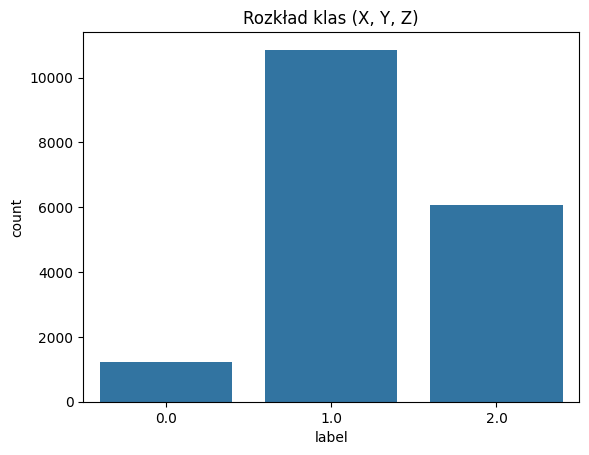

In [ ]:
sns.countplot(x=df.iloc[:, 0])
plt.title("Rozkład klas (X, Y, Z)")
plt.show()


##### Przykładowe obrazy

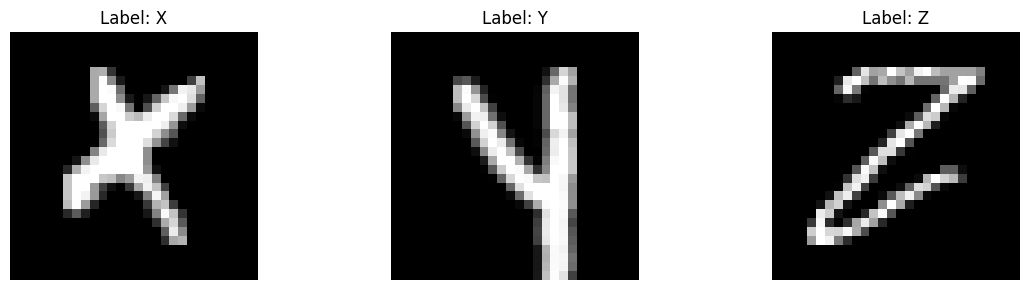

In [10]:
label_map = {0: 'X', 1: 'Y', 2: 'Z'}
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
labels = df.iloc[:, 0].values  # np. [0, 0, 1, 2, 2, ...]
images = df.iloc[:, 1:].values.reshape(-1, 28, 28)
for i, label_num in enumerate([0, 1, 2]):
    idx = np.where(labels == label_num)[0][0]
    axs[i].imshow(images[idx], cmap="gray")
    axs[i].set_title(f"Label: {label_map[label_num]}")
    axs[i].axis("off")
    
plt.tight_layout()
plt.show()


##### Średnie obrazy na klase

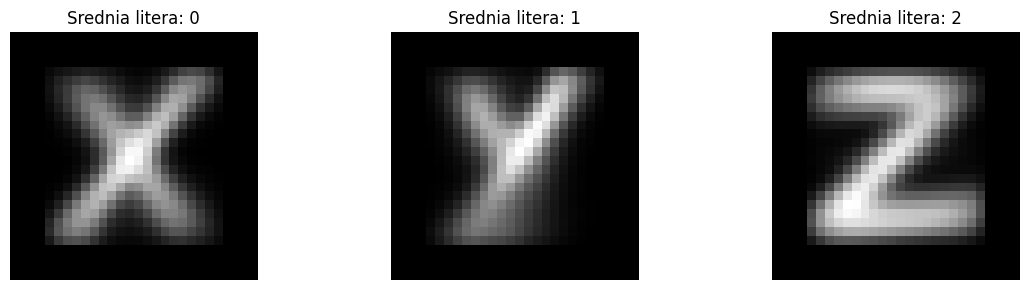

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for i, label_num in enumerate([0, 1, 2]):
    mean_img = images[labels == label_num].mean(axis=0)
    axs[i].imshow(mean_img, cmap='gray')
    axs[i].set_title(f'Srednia litera: {label_num}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

##### Proces trenowania modelu CNN

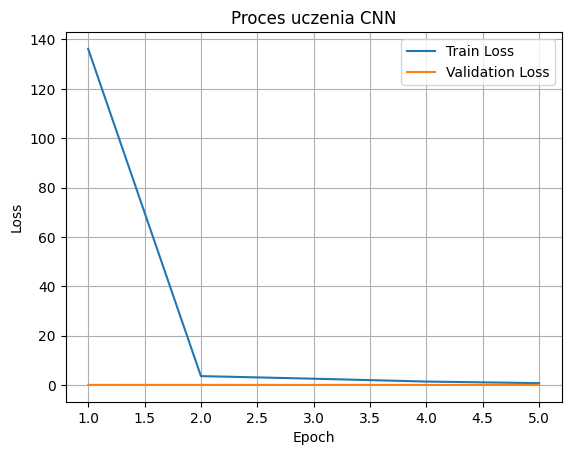

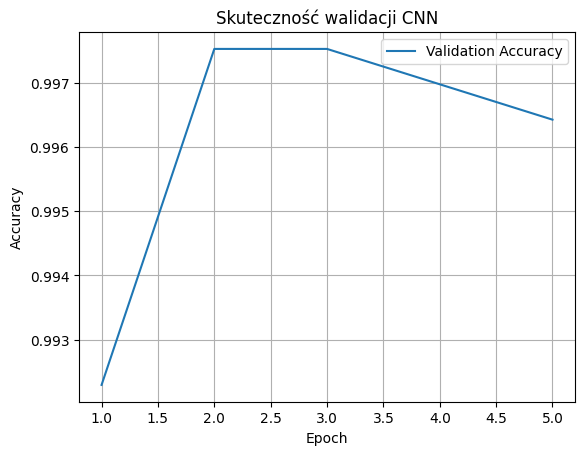

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

log = pd.read_csv(PROJECT_ROOT / "outputs/cnn_training_log.csv")

plt.plot(log["epoch"], log["train_loss"], label="Train Loss")
plt.plot(log["epoch"], log["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Proces uczenia CNN")
plt.legend()
plt.grid()
plt.show()

plt.plot(log["epoch"], log["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Skuteczność walidacji CNN")
plt.legend()
plt.grid()
plt.show()


## 3. Opis struktury plików

Kod projektu jest podzielony modularnie na:
- src/models – klasy i metody do tworzenia modeli
- src/data_loader – wczytywanie i przetwarzanie danych
- src/wrappers – trenowanie modeli klasycznych z opcjonalnym skalowaniem
- src/torch_trainer – trening modelu CNN w PyTorch
- src/evaluator – wspólne metody do oceny

Główne trenowanie i ewaluacja odbywa się w main.py, a notebook służy do prezentacji i EDA.

## 4. Wyniki modeli

In [20]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression", "KNN", "Random Forest", "SVM", "CNN (PyTorch)"
    ],
    "Accuracy": [0.9727, 0.9788, 0.9920, 0.9895, 0.9945],
})

results = results.sort_values("Accuracy", ascending=False)
results.style.background_gradient(cmap="Greens")

,Model,Accuracy
4,CNN (PyTorch),0.994500
2,Random Forest,0.992000
3,SVM,0.989500
1,KNN,0.978800
0,Logistic Regression,0.972700


## 5. Wnioski

- CNN osiągnął najwyższą skuteczność, wykorzystując strukturę obrazu (28x28) w odróżnieniu od modeli klasycznych.
- Klasyczne modele, zwłaszcza Random Forest i SVM, również uzyskały bardzo dobre wyniki.
- Najtrudniejsza była klasyfikacja litery 'X', prawdopodobnie z powodu najmniejszej liczby próbek.
- Kod został napisany modularnie, co pozwala na łatwe dodawanie kolejnych modeli i analiz.